# Forward Diffusion Procces

In [1]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

import math

from diffusion.schedules import beta_schedule
from diffusion.forward import compute_alphas, q_sample
from diffusion.utils.visualization import tensor2image

In [2]:
path = "../assets/sample.jpeg"
img = Image.open(path).convert("RGB")

In [3]:
transform = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor()
])

x0 = transform(img)

In [4]:
T_steps = 42 #you can change the steps 
betas = beta_schedule(T_steps)
_, alphas_bar = compute_alphas(betas)

In [5]:
noisy_imgs = []
for t in range(T_steps):
    xt = q_sample(x0, t, alphas_bar)
    noisy_imgs.append(xt)

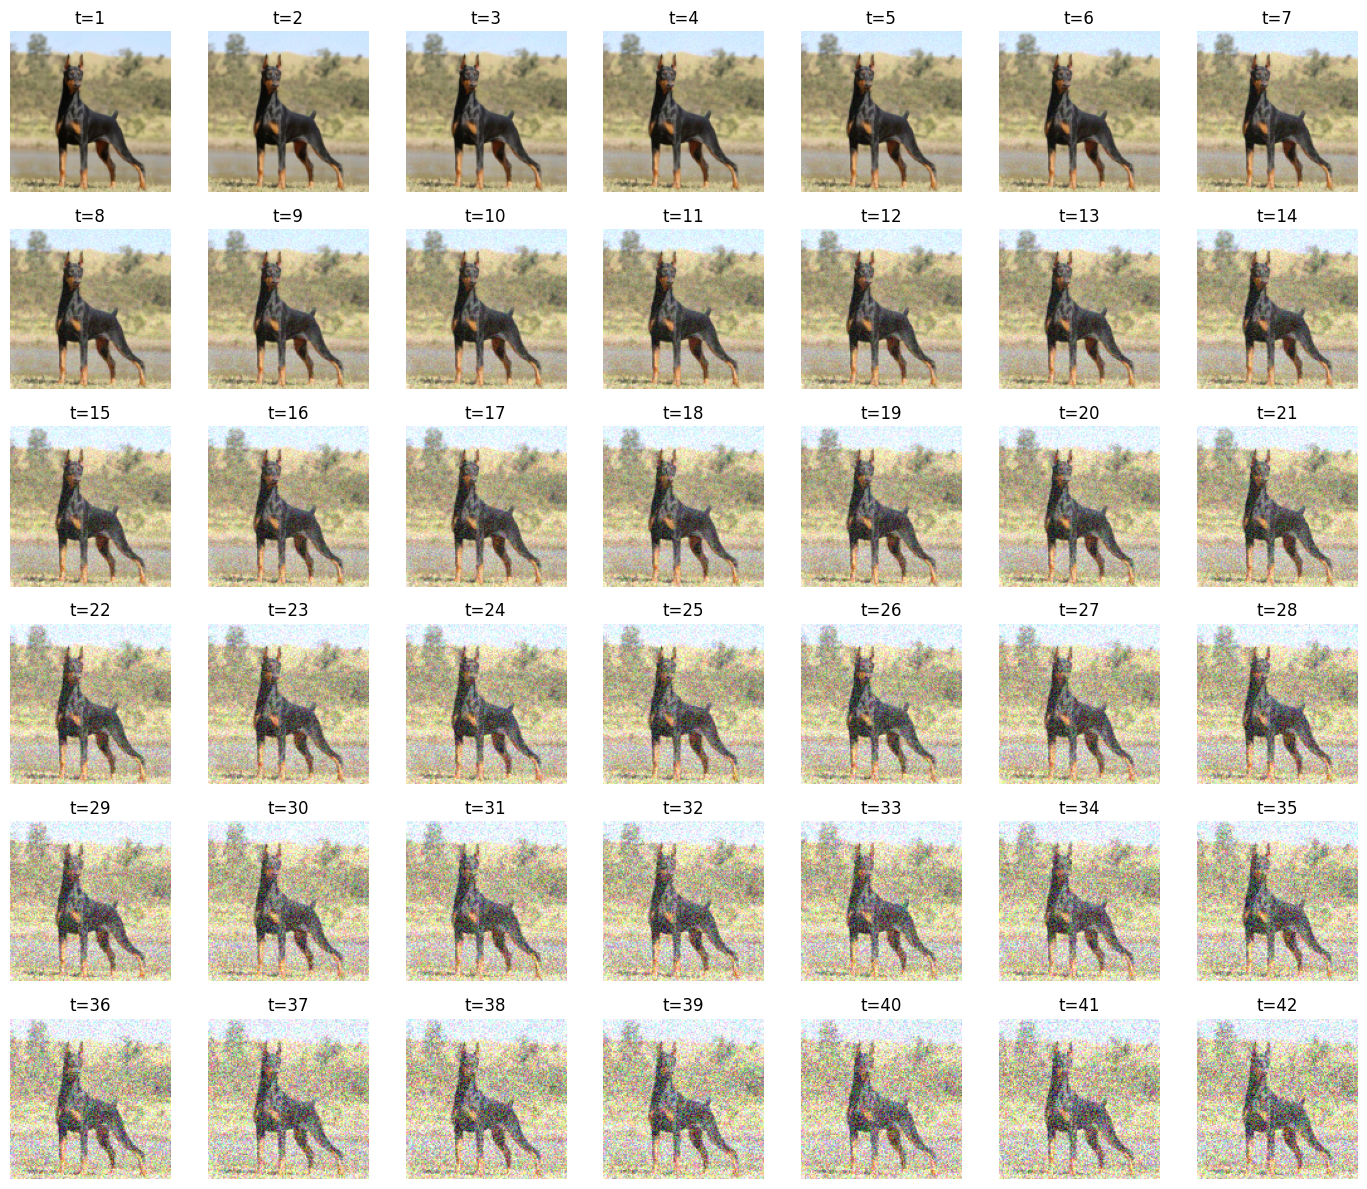

In [6]:
cols = math.ceil(math.sqrt(T_steps))
rows = math.ceil(T_steps / cols) #all of this is only to adjust the grid on the T_steps
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for ax, img_t, step in zip(axes.flatten(), noisy_imgs, range(T_steps)):
    ax.imshow(tensor2image(img_t))
    ax.set_title(f"t={step+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()